# Dealing With Credit Card Fraud Dataset:

**Notes: Credit Card fraud Dataset is a imbalanced dataset.**

**Our Goals**:
- Understanding our dataset and extract insights about that.
- Create a sup sample with an unbalanced dataset.
- Using different classifiers and deciding which one has a higher accuracy.

**Outlines**
1) Understanding our dataset.
2) Preprocessing.
3) Dealing with Imbalanced Datasets.
4) Testing.
5) concloution. 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.manifold import TSNE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

1) Data Collection:

In [2]:
df=pd.read_csv('train.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


2) Data Inspection:

In [4]:
shap=df.shape
print(f'Number of training examples: {shap[0]} ')
print(f'Number of features: {shap[1]} ')

Number of training examples: 170884 
Number of features: 31 


In [5]:
clas=df['Class'].unique()
num_class=len(clas)
print(f'class of data: {clas} and num of class: {num_class}')

class of data: [0 1] and num of class: 2


In [6]:
num_of_ones=len([x for x in df['Class'].to_numpy() if x == 1])
print(f'Number of examples class 1 : {num_of_ones} ')
print(f'Number of examples class 0 : {df.shape[0]-num_of_ones} ')

Number of examples class 1 : 305 
Number of examples class 0 : 170579 


Intuition about that:
- we have implance dataset, num_of_1 = 305 , num_of_0 = 170579
- the dataset is biased of false class.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [8]:
# missing values.
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Dataset do not have any non values in all columns.
- All data type of columns float while target value is int data type. 

In [9]:
# Get descriptive statistics of numerical columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


3) Data Visualization:

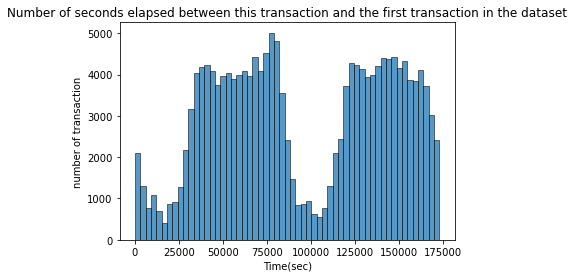

In [10]:
sns.histplot(df['Time'])
plt.xlabel('Time(sec)')
plt.ylabel('number of transaction')
plt.title('Number of seconds elapsed between this transaction and the first transaction in the dataset')
plt.show()

- These transcations are in 2 days 48 hours.
- Number of transcations in the first day more than the second day.

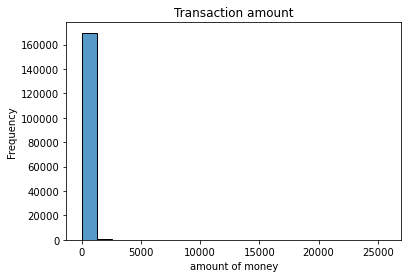

In [11]:
sns.histplot(df['Amount'],bins=20)
plt.xlabel('amount of money')
plt.ylabel('Frequency')
plt.title('Transaction amount')

plt.show()

- most transaction amount in range (0, 1250) about 160000 transcations.

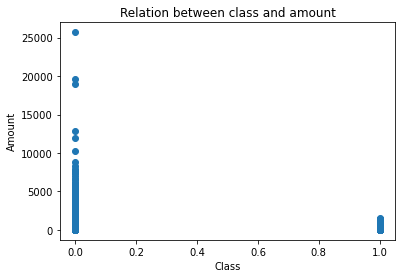

In [12]:
plt.scatter(df['Class'],df['Amount'])
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Relation between class and amount')
plt.show()

In [13]:
# to know the biggest amount is fraud
amount_big_one=max([x for (x,y) in zip(df['Amount'],df['Class']) if y ==1 ])
print(f'the biggest amount in fraud transcations: {amount_big_one}')

the biggest amount in fraud transcations: 1504.93


- All fraud transactions in range (0 , 1504.93) no others.  

4) Statistical Analysis:

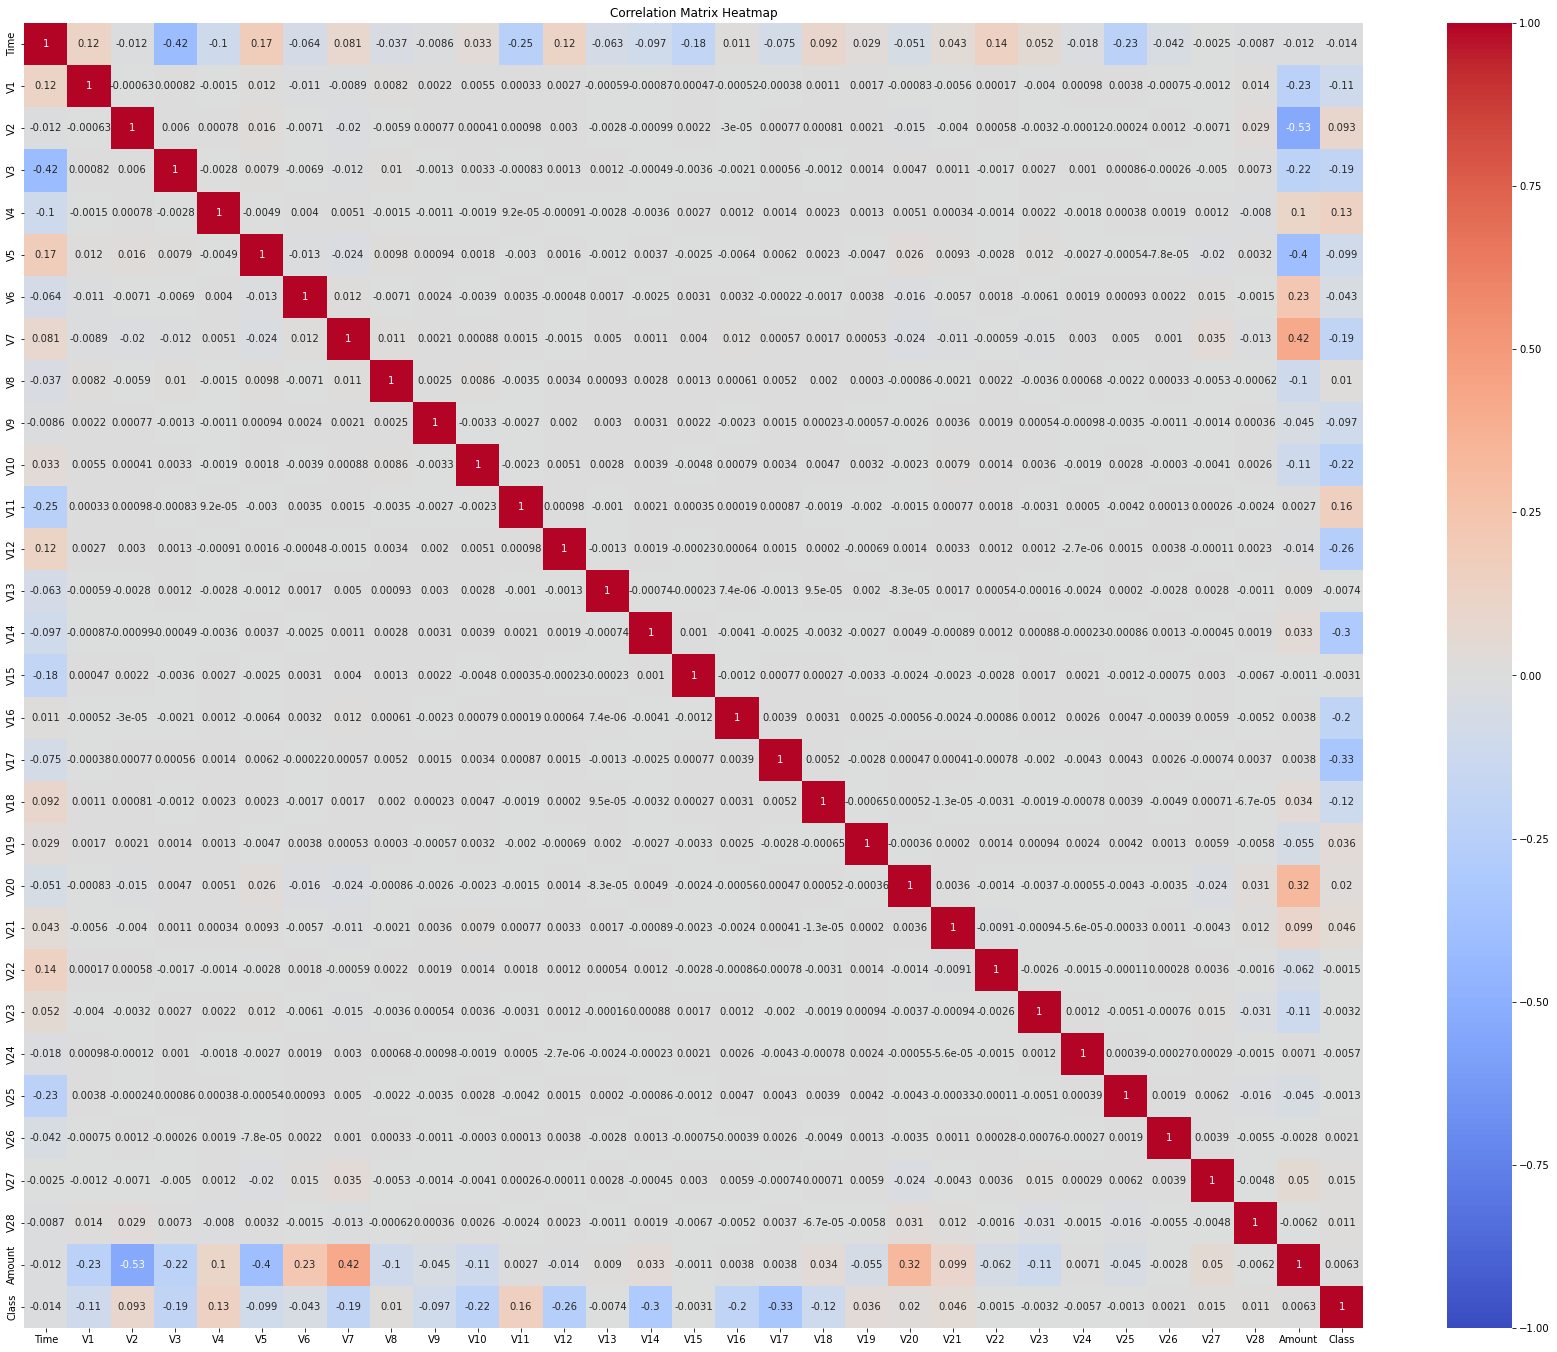

In [14]:
# Calculate correlation between variables.
correlation_matrix=df.corr()

plt.figure(figsize=(30,24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')

plt.show()

- There are realation between colum V11 and target (Class).

5) Summary and Insights:

- Imbalanced Dataset:

In [100]:
# visualize Imbalanced Dataset.
def project(X):
    if X.shape[1] > 2:
        # Project to 2 features
        # https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/
        tsne = TSNE(n_components=2, random_state=1)
        X = tsne.fit_transform(X)
    return X

def visualize(X, y):
    X = project(X)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.colorbar()
    plt.show()

In [15]:
# split train data and y
train = df.drop('Class',axis=1)
y = df['Class']

In [102]:
#visualize(train,y)

-) Model binary classification directly on the imbalanced dataset:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,classification_report

In [17]:
cnter = Counter(y)
print(cnter)
ir = cnter[0] / cnter[1]

model_impdata=LogisticRegression(solver='lbfgs')
model_impdata.fit(train,y)

Counter({0: 170579, 1: 305})


C:\Users\omar gamel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model_metric={} # dic to saving accuracy of model and f1_score during training.

def metrics_model(name_model, model,train, truth_table):
    '''
    function to saving different mtrics to different models.
    updata global dic when calling it.
    '''
    global model_metric
    
    metrics_fun=[accuracy_score, f1_score]
    metrics=['accuracy_score', 'f1_score']
    model_metric[name_model]={}
    perdic=model.predict(train)
    
    for idx,metric in enumerate(metrics_fun):
        model_metric[name_model][metrics[idx]]=metric(truth_table,perdic)

In [19]:
metrics_model('model_impdata',model_impdata,train ,y)

-) Strategies to handle imbalanced datasets:

1) Oversampling: Increase the number of instances in the minority class.

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
def over_sample(x, y, factor):
    counter = Counter(y)            
    majoirty_size = counter[0]  
    new_sz = int(majoirty_size / factor)
    #ratio of the number of samples in the minority class to the majority class.
    ros = RandomOverSampler(random_state=11, sampling_strategy={1: new_sz})
    X_resampled, y_resampled = ros.fit_resample(x, y)


    return X_resampled, y_resampled

In [22]:
x_os, y_os=over_sample(train,y, 100) 
Counter(y_os)

Counter({0: 170579, 1: 1705})

In [23]:
model_over_sample=LogisticRegression(solver='lbfgs')
model_over_sample.fit(x_os,y_os)
metrics_model('model_over_sample' ,model_over_sample ,x_os ,y_os)

C:\Users\omar gamel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2) Undersampling: Decrease the number of instances in the majority class.

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
def under_sample(x, y, factor):
    counter = Counter(y)            
    minority_size = counter[1]  
    new_sz = int(minority_size * factor)
    #ratio of the number of samples in the majority(neg) class to the minority(pos) class
    rus = RandomUnderSampler(random_state=11, sampling_strategy={0:new_sz})
    X_resampled, y_resampled = rus.fit_resample(x, y)

    return X_resampled, y_resampled

In [26]:
x_us, y_us=under_sample(train,y, 100) 
Counter(y_us)

Counter({0: 30500, 1: 305})

In [27]:
model_under_sample=LogisticRegression(solver='lbfgs')
model_under_sample.fit(x_us,y_us)
metrics_model('model_under_sample' ,model_under_sample ,x_us, y_us)

C:\Users\omar gamel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3) SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
def smot_over_sample(x, y, factor):
    counter = Counter(y)            
    majoirty_size = counter[0]  
    new_sz = int(majoirty_size / factor)
    
    smote = SMOTE(random_state=11, sampling_strategy={1: new_sz},k_neighbors=5)
    X_resampled, y_resampled = smote.fit_resample(x, y)
    return X_resampled, y_resampled

In [30]:
x_smot, y_smot=smot_over_sample(train,y, 100) 
Counter(y_smot)

Counter({0: 170579, 1: 1705})

In [31]:
model_smot_sample=LogisticRegression(solver='lbfgs')
model_smot_sample.fit(x_us,y_us)
metrics_model('model_smot_sample' ,model_smot_sample ,x_smot, y_smot)

C:\Users\omar gamel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
model_metric

{'model_impdata': {'accuracy_score': 0.9990227288687062,
  'f1_score': 0.7202680067001674},
 'model_over_sample': {'accuracy_score': 0.9967553574330756,
  'f1_score': 0.8264514126047812},
 'model_under_sample': {'accuracy_score': 0.996916085051128,
  'f1_score': 0.8353552859618717},
 'model_smot_sample': {'accuracy_score': 0.9976608390796592,
  'f1_score': 0.878796992481203}}

- val dataset:

In [33]:
val=pd.read_csv('val.csv')
x_val=val.drop('Class',axis=1)
y_val=val['Class']

1) Oversampling:

In [34]:
x_os_val, y_os_val=over_sample(x_val,y_val,100)
Counter(y_os_val)

Counter({0: 56870, 1: 568})

In [35]:
metrics_model('model_over_sample_val',model_over_sample,x_os_val, y_os_val)

In [36]:
x_us_val, y_us_val=under_sample(x_val,y_val,100)
Counter(y_us_val)

Counter({0: 9000, 1: 90})

In [37]:
metrics_model('model_under_sample_val',model_under_sample,x_os_val, y_os_val)

In [38]:
x_smot_val, y_smot_val=smot_over_sample(x_val,y_val,100)
Counter(y_smot_val)

Counter({0: 56870, 1: 568})

In [39]:
metrics_model('model_impdata_val',model_impdata,x_val,y_val)
metrics_model('model_impdata_val',model_impdata,x_val,y_val)
metrics_model('model_impdata_val',model_impdata,x_val,y_val)


x_os_val, y_os_val=over_sample(x_val,y_val,100)
Counter(y_os_val)

In [41]:
model_metric

{'model_impdata': {'accuracy_score': 0.9990227288687062,
  'f1_score': 0.7202680067001674},
 'model_over_sample': {'accuracy_score': 0.9967553574330756,
  'f1_score': 0.8264514126047812},
 'model_under_sample': {'accuracy_score': 0.996916085051128,
  'f1_score': 0.8353552859618717},
 'model_smot_sample': {'accuracy_score': 0.9976608390796592,
  'f1_score': 0.878796992481203},
 'model_over_sample_val': {'accuracy_score': 0.9967617256868275,
  'f1_score': 0.8296703296703297},
 'model_under_sample_val': {'accuracy_score': 0.9972317977645461,
  'f1_score': 0.8531855955678671},
 'model_impdata_val': {'accuracy_score': 0.9990695224719102,
  'f1_score': 0.7005649717514124}}

- The best f1_score with model_smot_sample.
- Generate synthetic samples for the minority class with factor 2 (minority class= 1/2  the majority class)
- f1_score is 0.95906